In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://data.wprdc.org/dataset/c6265ffb-c86e-4a2c-870b-1aaa0772c449/resource/7996d143-c155-466e-8414-115f74997dd7/download/poverty-status-of-individuals-in-the-past-12-months-by-living-arrangement.csv")

In [3]:
dt_filter = data.filter(regex="Margin")
data.drop(dt_filter.columns,axis=1)
data = data[["Neighborhood","Estimate; Total:","Estimate; Income in the past 12 months at or above poverty level:","Estimate; Income in the past 12 months below poverty level:"]]

In [4]:
data = data.rename(columns={"Estimate; Total:":"Total","Estimate; Income in the past 12 months at or above poverty level:":"Above poverty level","Estimate; Income in the past 12 months below poverty level:":"Below poverty level"})

In [5]:
data["Above poverty level"] = data["Above poverty level"] / data ["Total"] * 100
data["Below poverty level"] = data["Below poverty level"] / data ["Total"] * 100

In [6]:
fiter_above = data["Total"] * data["Above poverty level"] > 10
fiter_below = data["Total"] * data["Below poverty level"] > 10

data = data[fiter_below]
data = data[fiter_above]

c:\users\scott\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [7]:
data.sort_values(by=["Above poverty level"],ascending=False)

,Neighborhood,Total,Above poverty level,Below poverty level
82,Swisshelm Park,1286.0,96.034215,3.965785
57,North Shore,187.0,95.721925,4.278075
55,New Homestead,933.0,95.498392,4.501608
80,Strip District,689.0,95.210450,4.789550
5,Banksville,3944.0,93.610548,6.389452
...,...,...,...,...
83,Terrace Village,1632.0,41.911765,58.088235
19,Central Oakland,5064.0,30.785940,69.214060
6,Bedford Dwellings,1169.0,30.282293,69.717707
4,Arlington Heights,380.0,26.842105,73.157895


In [8]:
data.sort_values(by=["Below poverty level"],ascending=False)

,Neighborhood,Total,Above poverty level,Below poverty level
58,Northview Heights,1380.0,19.130435,80.869565
4,Arlington Heights,380.0,26.842105,73.157895
6,Bedford Dwellings,1169.0,30.282293,69.717707
19,Central Oakland,5064.0,30.785940,69.214060
83,Terrace Village,1632.0,41.911765,58.088235
...,...,...,...,...
5,Banksville,3944.0,93.610548,6.389452
80,Strip District,689.0,95.210450,4.789550
55,New Homestead,933.0,95.498392,4.501608
57,North Shore,187.0,95.721925,4.278075


In [9]:
plt.rcParams.update({'font.size': 20})

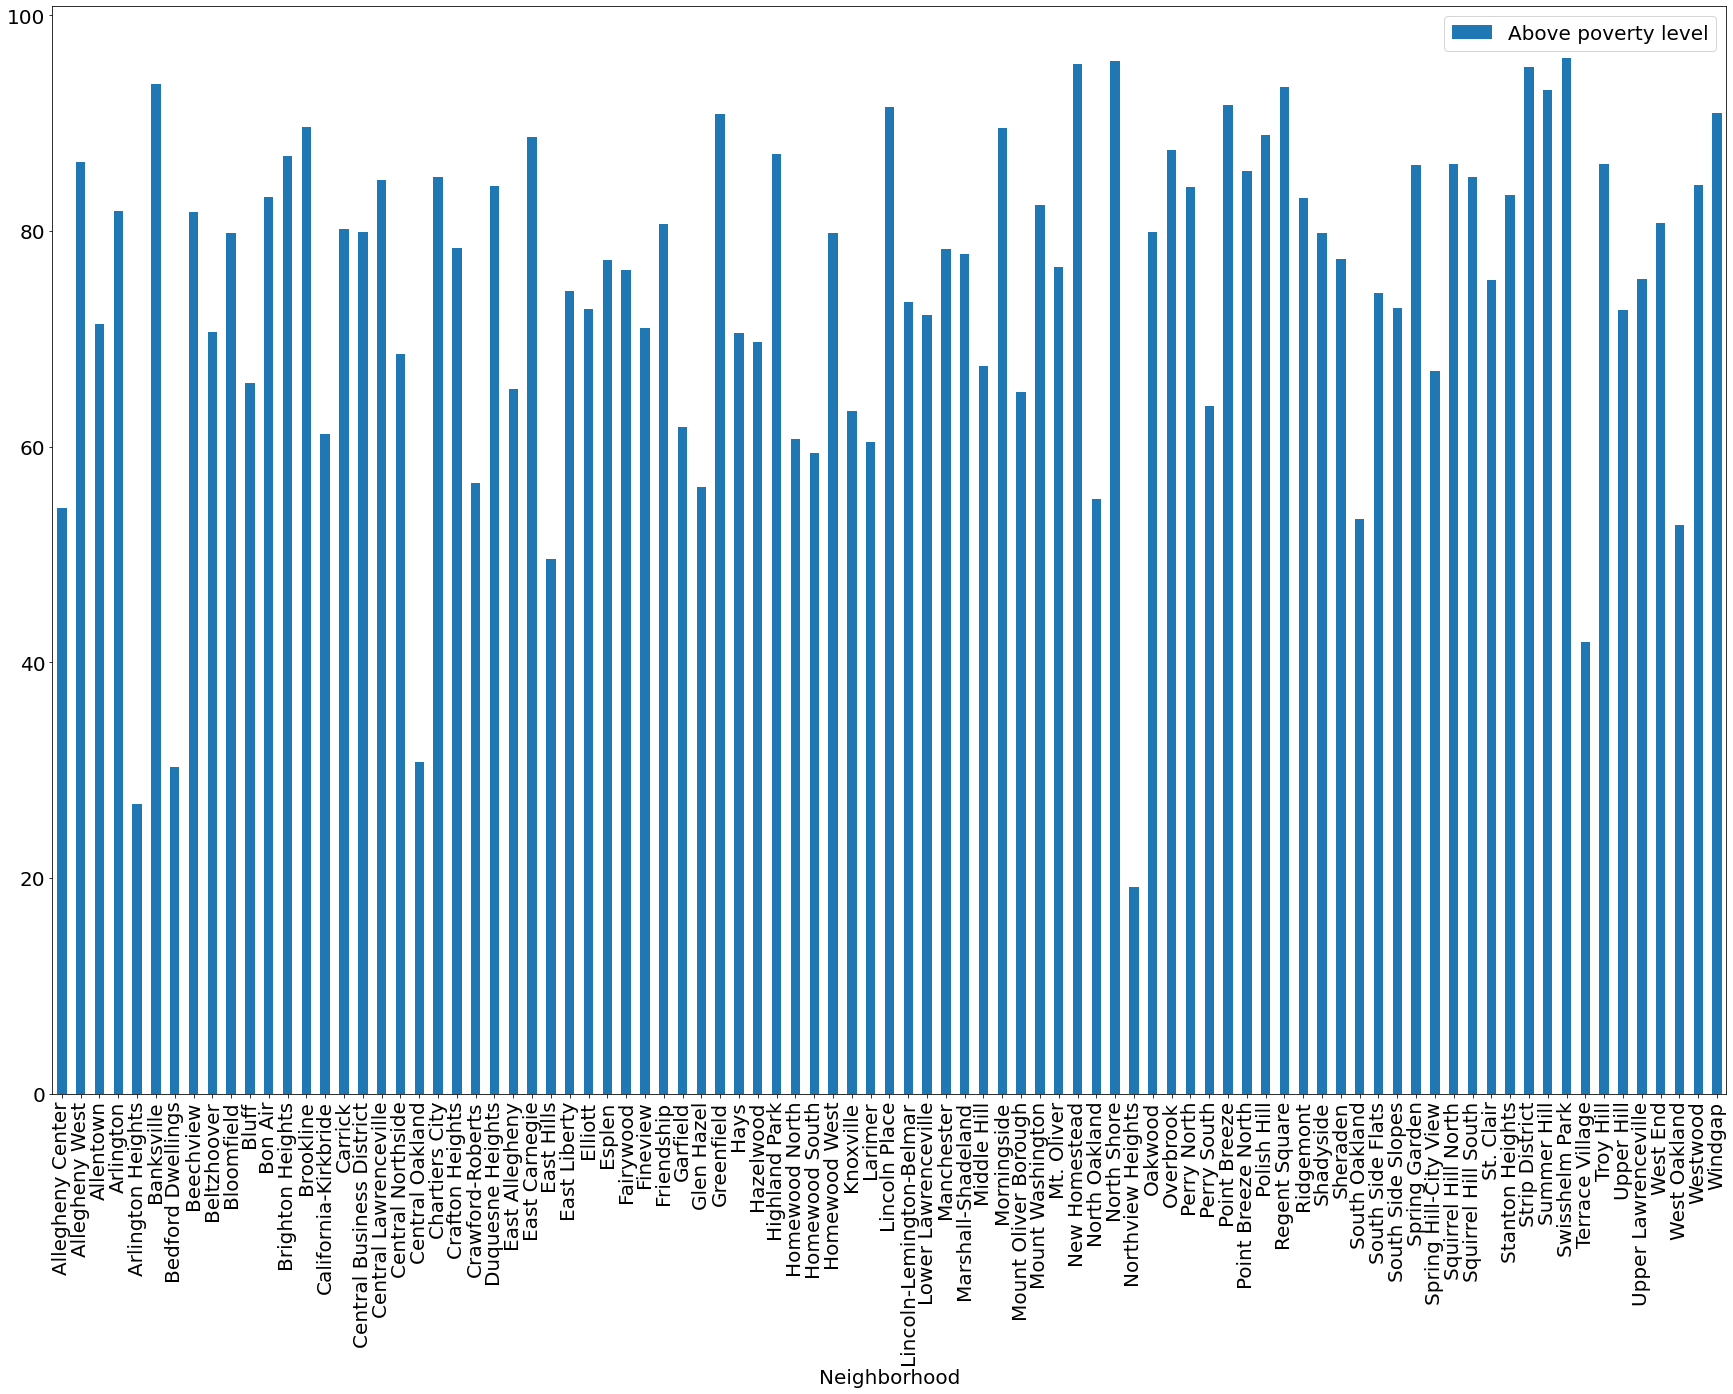

In [10]:
new = data[["Neighborhood","Above poverty level"]]
new.plot(x='Neighborhood', kind='bar', rot=90, figsize = (30,20))

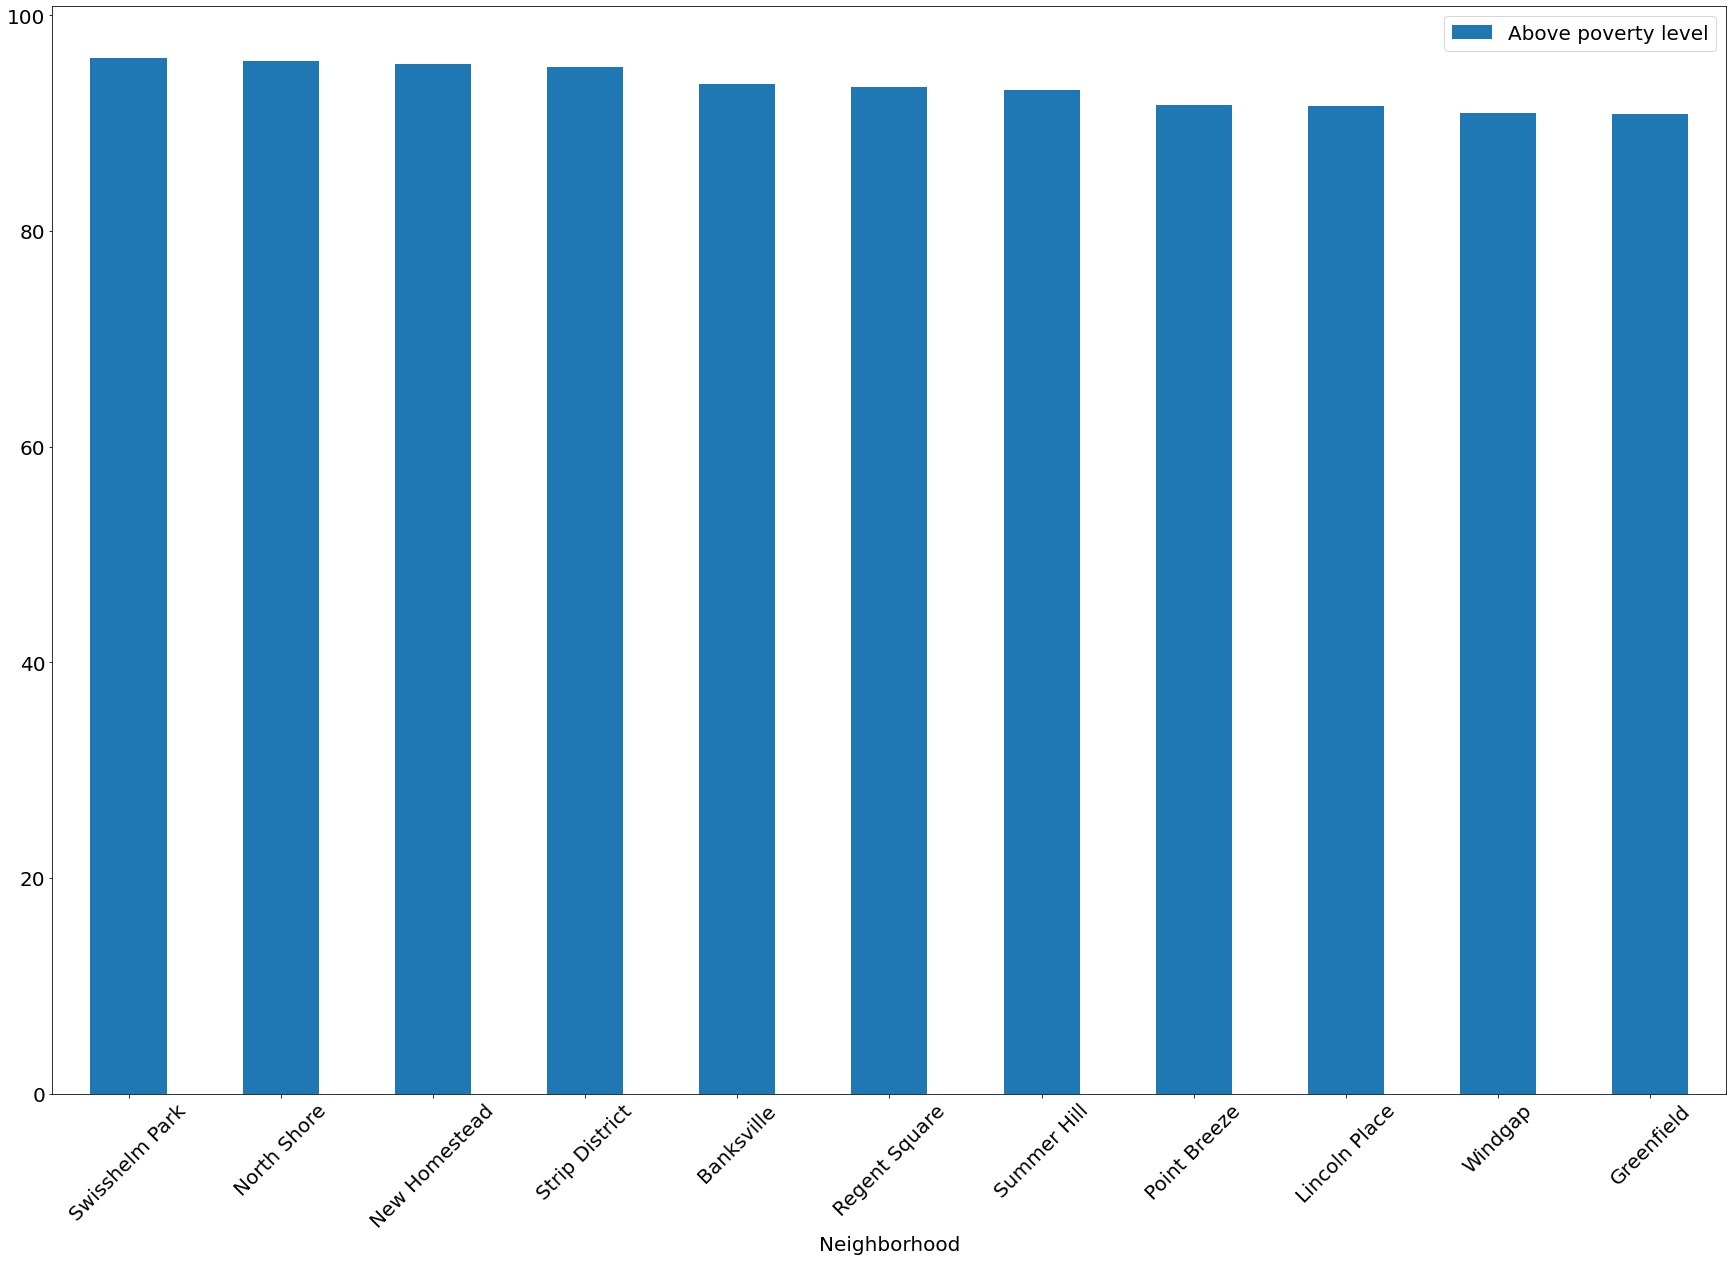

In [12]:
above = new.loc[new["Above poverty level"]>90]
above = above.sort_values(by=["Above poverty level"],ascending=False)
above.plot(x='Neighborhood', kind='bar', rot=45, figsize = (30,20))